In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
rf1=(128*1.78*(10**-5)*3)/(np.pi*1.21*(0.03**4))
rf2=(128*1.78*(10**-5)*6)/(np.pi*1.21*(0.03**4))
cf1=(np.pi*(0.5**2))/(4*9.81)
cf2=(np.pi*(0.4**2))/(4*9.81)
pcomp=5*100000 #[Pa]
#hay presiones 1 y2, en 2 ecuaciones
h=1; n=701; p1=np.zeros(n);p2=np.zeros(n);p1[0]=0;p2[0]=0
t=np.arange(701)

# Primero-> se identifica que la ecuación 2 no depende de la presión 1, luego de ahí puedo hallar la P2(t)

$$ (C_{f,1}C_{f,2}R_{f,1}R_{f,2})\dfrac{d^2p_2(t)}{dt^2}+[C_{f,2}(R_{f,1}+R_{f,2})+C_{f,1}R_{f,1}]\dfrac{dp_2(t)}{dt} + p_2(t)=p_{comp}$$

Condiciones: 
$$h=1 s$$

$$p_2(0)=0$$

$$0 < t < 700s$$

# Pasos
1. Despeje de la derivada de mayor orden:
$$ \dfrac{d^2p_2(t)}{dt^2}=\dfrac{p_{comp}-[C_{f,2}(R_{f,1}+R_{f,2})+C_{f,1}R_{f,1}]\dfrac{dp_2(t)}{dt}-p_2(t)}{(C_{f,1}C_{f,2}R_{f,1}R_{f,2})}$$

#### Condiciones:
$$p_2(0)=0$$
$$p'_2(0)=¿?$$


2. Transformación de variables:
$$ p_{21}(t)=p_2(t)$$
$$ p_{22}(t)=p'_2(t)$$
$$ p_{23}(t)=p''_2(t)$$

3. Construcción del sistema de EDO de primer orden → se derivan las ecuaciones anteriores:
$$ \dfrac{dp_{21}(t)}{dt}=p'_{21}(t)=p'_{2}(t)$$
$$ \dfrac{dp_{22}(t)}{dt}=p'_{22}(t)=\dfrac{dp'_{2}(t)}{dt}=p''_2(t)$$

### Sistema:
$$ \dfrac{dp_{21}(t)}{dt}=p_{22}(t)$$

$$ \dfrac{dp_{22}(t)}{dt}=\dfrac{p_{comp}-[C_{f,2}(R_{f,1}+R_{f,2})+C_{f,1}R_{f,1}]p_{22}(t)-p_{21}(t)}{(C_{f,1}C_{f,2}R_{f,1}R_{f,2})}$$
#### Donde:
$$p_{21}(0)=p_{2}(0)=0$$
# OJO Rectificar:
$$p_{22}(0)=p'_{2}(0)=\dfrac{dp_{21}(0)}{dt}=¿?$$

# SOLUCIÓN
Solución: Ahora que se tiene un sistema de dos EDO de primer orden, se puede obtener la solución usando el método de RK de cuarto orden.
Para proceder con el cálculo de los términos k1 a k4, se identifican las funciones que definen las dos ecuaciones diferenciales:

$$f_1(x,p_{21},p_{22})=p_{22}(t)$$

$$f_2(x,p_{21},p_{22})=\dfrac{p_{comp}-[C_{f,2}(R_{f,1}+R_{f,2})+C_{f,1}R_{f,1}]p_{22}(t)-p_{21}(t)}{(C_{f,1}C_{f,2}R_{f,1}R_{f,2})}$$

In [3]:
p21=np.zeros(n);p22=np.zeros(n)
p21[0]=0; p22[0]=0

In [4]:
for j in range(0,700):
    k11=p22[j] #porque p22[0]=0
    k12=(pcomp-(cf2*(rf1+rf2)+cf1*rf1)*p22[j]-p21[j])/(cf1*cf2*rf1*rf2)
    k21=p22[j]+0.5*k12*h
    k22=(pcomp-(cf2*(rf1+rf2)+cf1*rf1)*(p22[j]+0.5*k12*h)-(p21[j]+0.5*k11*h))/(cf1*cf2*rf1*rf2)
    k31=p22[j]+0.5*k22*h
    k32=(pcomp-(cf2*(rf1+rf2)+cf1*rf1)*( p22[j]+0.5*k22*h)-(p21[j]+0.5*k21*h))/(cf1*cf2*rf1*rf2)
    k41= p22[j]+k32*h
    k42=(pcomp-(cf2*(rf1+rf2)+cf1*rf1)*(p22[j]+k32*h)-(p21[j]+k31*h))/(cf1*cf2*rf1*rf2)
    p21[j+1]=p21[j]+(1/6)*(k11+2*k21+2*k31+k41)*h
    p22[j+1]=p22[j]+(1/6)*(k12+2*k22+2*k32+k42)*h

# Luego debo resolver P1(t)
$$ \dfrac{dp_1(t)}{dt}=\dfrac{R_{f,2}p_{comp}-(R_{f,1}+R_{f,2})p_1(t)-R_{f,1}p_2(t)}{(C_{f,1}R_{f,1}R_{f,2})}$$
Condiciones iniciales:

$$ p_1(0)=0$$

$$ p'_1(0)=\dfrac{R_{f,2}p_{comp}-(R_{f,1}+R_{f,2})p_1(0)-R_{f,1}p_2(0)}{(C_{f,1}R_{f,1}R_{f,2})}$$

#### SIN EMBARGO P1' NO SE NECESITA

$$ p_1(0)=0$$

$$ p'_1(0)=11253.2549$$

In [5]:
for i in range(0,700):
    k1=(rf2*pcomp-(rf1+rf2)*p1[i]-rf1*p21[i])/(cf1*rf1*rf2)
    k2=(rf2*pcomp-(rf1+rf2)*(p1[i]+0.5*k1*h)-rf1*p21[i])/(cf1*rf1*rf2)
    k3=(rf2*pcomp-(rf1+rf2)*(p1[i]+0.5*k2*h)-rf1*p21[i])/(cf1*rf1*rf2)
    k4=(rf2*pcomp-(rf1+rf2)*(p1[i]+k3*h)-rf1*p21[i])/(cf1*rf1*rf2)
    p1[i+1]=p1[i]+(1/6)*(k1+2*k2+2*k3+k4)

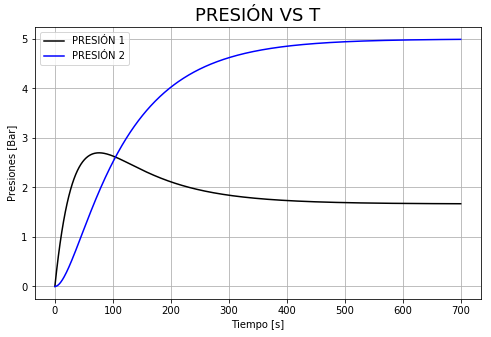

In [6]:
plt.figure(figsize=(8,5))
plt.plot(t,p1/100000,color='K', label='PRESIÓN 1')
plt.plot(t,p21/100000,color='b', label='PRESIÓN 2')
plt.xlabel('Tiempo [s]')
plt.ylabel('Presiones [Bar]')
plt.title("PRESIÓN VS T",fontsize = 18)
plt.grid()
plt.legend()